In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import svm, datasets, metrics, model_selection, preprocessing, pipeline

In [ ]:
xlsx = pd.ExcelFile('Feat_extracts well3.xlsx')
df = pd.read_excel(xlsx, 'PCAs')
dataset_pca= df.copy()
dataset_pca

In [ ]:

# convert 3d to 2d
# dataset_pca.pop('PC3')




dataset_pca.pop('index')


dataset_pca

In [ ]:
# import treated data

xlsx_3 = pd.ExcelFile('Feat_extracts well3.xlsx')
df_3 = pd.read_excel(xlsx_3, 'target')
pca_target= df_3.copy()

pca_target

In [54]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 4X')
dataset1= df.copy()




from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset1.keys())

# dropping columns
droppies= ['SFL' , 'NPHI', 'LLS', 'LLD']
dataset.drop(droppies, inplace=True, axis=1)

# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7, shuffle=True)

print('train samples:', len(train_input))
print('test samples', len(test_input))


[[-1.73163915  2.51697914  0.14781493 ... -2.87725798 -0.02998333
  -3.06763472]
 [-1.73081574  2.52923055  0.4129627  ... -2.93944911 -0.31479146
  -3.7477384 ]
 [-1.72999232  2.54148197  0.80347369 ... -3.00164023 -0.25737338
  -4.21784884]
 ...
 [ 1.72999232 -0.57576699 -0.63341287 ...  0.06032096 -0.12310411
   1.7543647 ]
 [ 1.73081574 -0.57596783 -0.60694777 ...  0.14599241 -0.13214277
   1.74230317]
 [ 1.73163915 -0.57616867 -0.90593453 ...  0.15804987 -0.15340622
   1.7008101 ]]
train samples: 2944
test samples 1263


In [35]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [5,1, 0.1,0.5,0.6, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'rbf']
             }

svc = svm.SVR()
model_cv = GridSearchCV(svc, param_grid)

model_cv.fit(train_input, train_target)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [5, 1, 0.1, 0.01, 0.001, 0.0001]})

In [36]:
# model.cv_results_

model_cv.best_params_

{'C': 10, 'gamma': 1}

In [ ]:
# sorted(model.cv_results_.keys())

In [55]:
model = pipeline.make_pipeline(
#     preprocessing.StandardScaler(),
    svm.SVR(C=10.0,
#             epsilon=0.2
            gamma= 1
           ))
model.fit(train_input, train_target,
#                         early_stopping_rounds=10,
         
         )




Pipeline(steps=[('svr', SVR(C=10.0, gamma=1))])

Text(0, 0.5, 'Predicted')

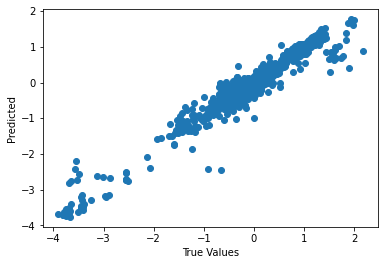

In [56]:
predicted = model.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')


In [57]:
print("r2 score: {}".format(metrics.r2_score( test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error( test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.9490428154242242
mse: 0.047734072653537234
rmse: 0.21848128673535688
mae: 0.1366490075174264


# TEST ON DIFFERENT WELLS

In [ ]:
# Feat_extracts well3
def predictme(well_name):
    xlsx_2 = pd.ExcelFile(well_name)
    df_2 = pd.read_excel(xlsx_2, 'PCAs')
    dataset_pca_2= df_2.copy()


    dataset_pca_2.pop('PC3')
    dataset_pca_2.pop('index')

    dataset_pca_2


    xlsx_2y = pd.ExcelFile(well_name)
    df_2y = pd.read_excel(xlsx_2y, 'target')
    pca_target_2y= df_2y.copy()

    # pca_target_2y.pop('RHOB')
    pca_target_2y



    predicted_2y = model.predict(dataset_pca_2)

    fig, ax = plt.subplots()
    ax.scatter(pca_target_2y, predicted_2y, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(pca_target_2y, predicted_2y)))
    print("mse: {}".format(metrics.mean_squared_error(pca_target_2y, predicted_2y)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(pca_target_2y, predicted_2y))))
    print("mae: {}".format(metrics.mean_absolute_error(pca_target_2y, predicted_2y)))
    
    return 

predictme("Feat_extracts well4.xlsx")

In [ ]:
# Feat_extracts well3


def predictme(wellname):
    
    xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
    df = pd.read_excel(xlsx, wellname)
    dataset= df.copy()

    def standardizme(dataset, outname):
        from sklearn.preprocessing import StandardScaler
        scaler1 = StandardScaler()
        Sd_scaler1 =scaler1.fit(dataset)
        data1_Sd= Sd_scaler1.transform(dataset)
        print(data1_Sd)

        #convert to dataframe
        outname= pd.DataFrame(data1_Sd, columns=dataset.keys())

        return outname

    standardizme(dataset,dataset)


    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')


    predicted = model.predict(inputs2)

    fig, ax = plt.subplots()
    ax.scatter(target, predicted, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mse: {}".format(metrics.mean_squared_error(target, predicted)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(target, predicted))))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 3X')
# predictme("Feat_extracts well4.xlsx")

r2 score: 0.1594786487842761
mse: 0.8405213512157239
rmse: 0.9167995152789534
mae: 0.680561284565661


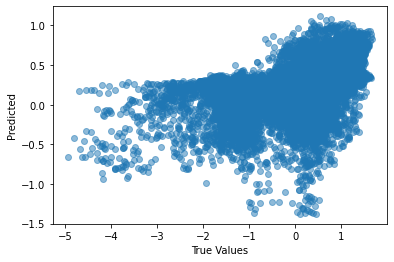

In [60]:
# Feat_extracts well3


def predictme(wellname):
    
    xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
    df = pd.read_excel(xlsx, wellname)
    dataset_ext= df.copy()


    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    Sd_scaler1 =scaler1.fit(dataset_ext)
    data1_Sd= Sd_scaler1.transform(dataset_ext)
    # print(data1_Sd)

            #convert to dataframe
    dataset= pd.DataFrame(data1_Sd, columns=dataset_ext.keys())
    
    # dropping columns
    droppies= ['SFL' , 'NPHI', 'LLS', 'LLD']
    dataset.drop(droppies, inplace=True, axis=1)

#     print(dataset)
    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')


    predicted = model.predict(inputs2)

    fig, ax = plt.subplots()
    ax.scatter(target, predicted, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mse: {}".format(metrics.mean_squared_error(target, predicted)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(target, predicted))))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 1X')
# predictme("Feat_extracts well4.xlsx")